In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('insurance.csv')

In [3]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
train.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
train.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<AxesSubplot:xlabel='charges', ylabel='Density'>

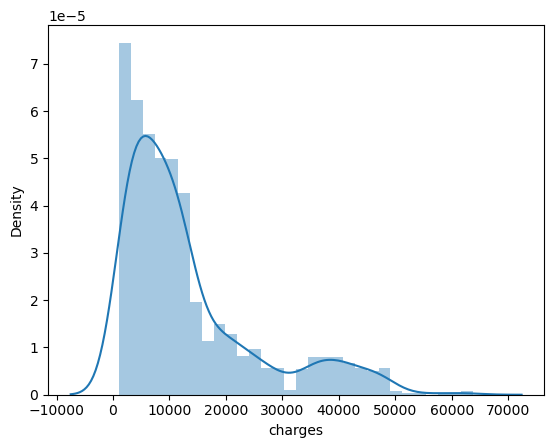

In [7]:
sns.distplot(train['charges'])

In [8]:
train['charges_log'] = np.log1p(train['charges'])

<AxesSubplot:xlabel='charges_log', ylabel='Density'>

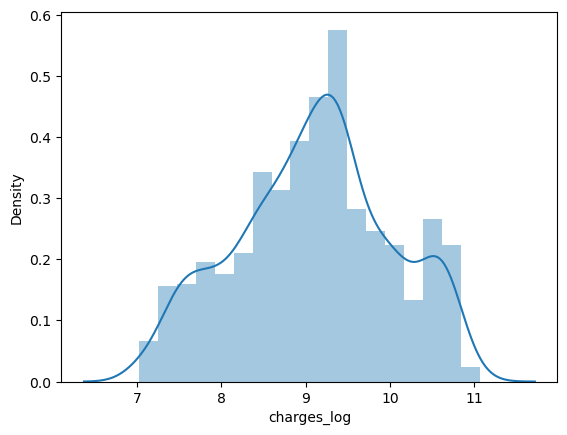

In [9]:
sns.distplot(train['charges_log'])

In [10]:
train.corr()

,age,bmi,children,charges,charges_log
age,1.000000,0.109272,0.042469,0.299008,0.527807
bmi,0.109272,1.000000,0.012759,0.198341,0.132678
children,0.042469,0.012759,1.000000,0.067998,0.161317
charges,0.299008,0.198341,0.067998,1.000000,0.892996
charges_log,0.527807,0.132678,0.161317,0.892996,1.000000


<AxesSubplot:>

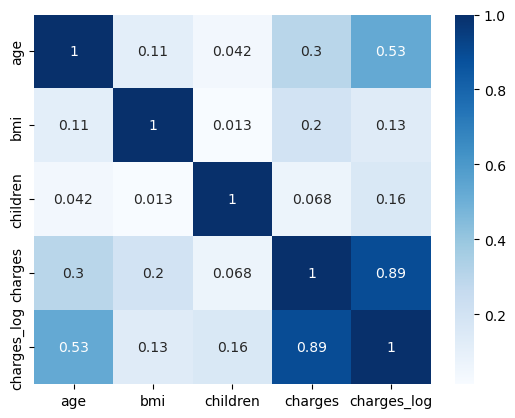

In [11]:
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [12]:
train.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
sex_dict = { 'female':0, 'male':1 }

In [14]:
train['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
train.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
train.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
smoker_dict = { 'no':0, 'yes':1 }
region_dict = { 'southeast':4, 'southwest':3, 'northeast':2, 'northwest':1 }

train['sex'] = train['sex'].map(sex_dict)
train['smoker'] = train['smoker'].map(smoker_dict)
train['region'] = train['region'].map(region_dict)

In [18]:
train.corr()

,age,sex,bmi,children,smoker,region,charges,charges_log
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.005212,0.299008,0.527807
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.016121,0.057292,0.005644
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.261829,0.198341,0.132678
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.019257,0.067998,0.161317
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.053930,0.787251,0.665539
region,-0.005212,0.016121,0.261829,-0.019257,0.053930,1.000000,0.056993,0.003412
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.056993,1.000000,0.892996
charges_log,0.527807,0.005644,0.132678,0.161317,0.665539,0.003412,0.892996,1.000000


<AxesSubplot:>

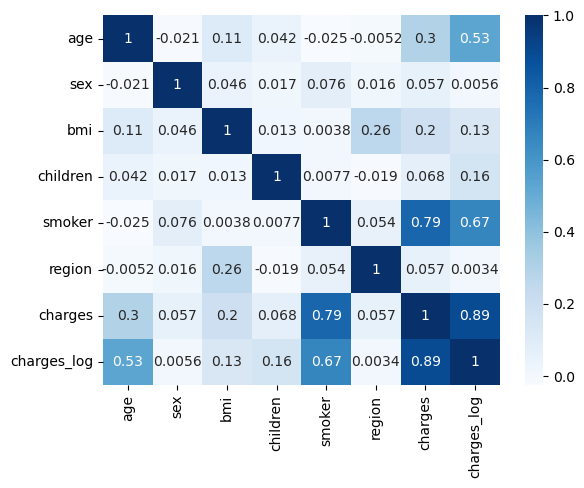

In [19]:
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [20]:
category_col = ['sex', 'smoker', 'region', 'children']
numeric_col = ['age', 'bmi']

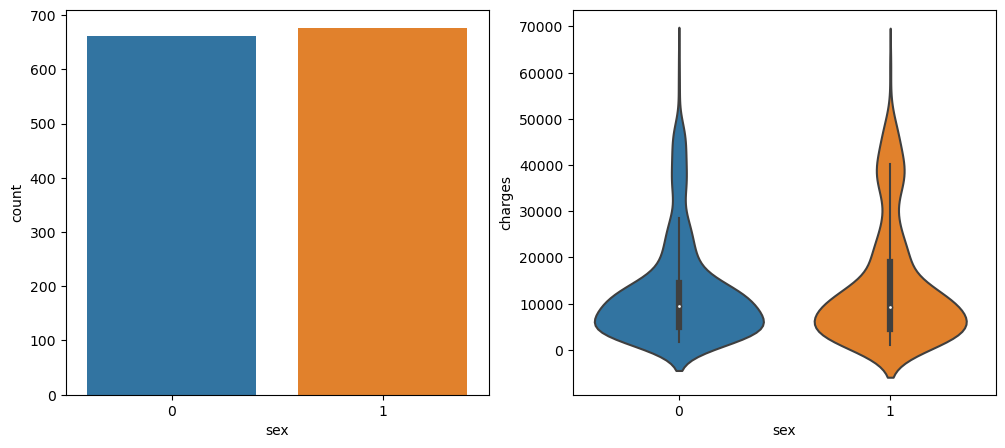

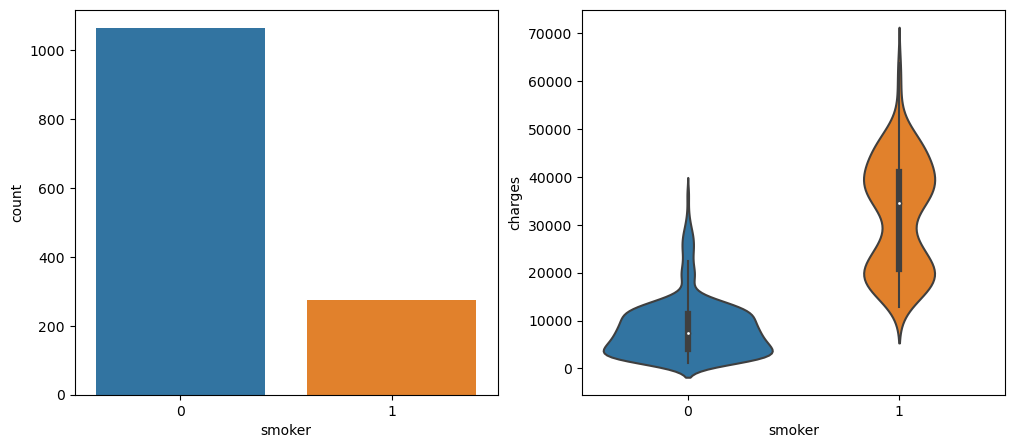

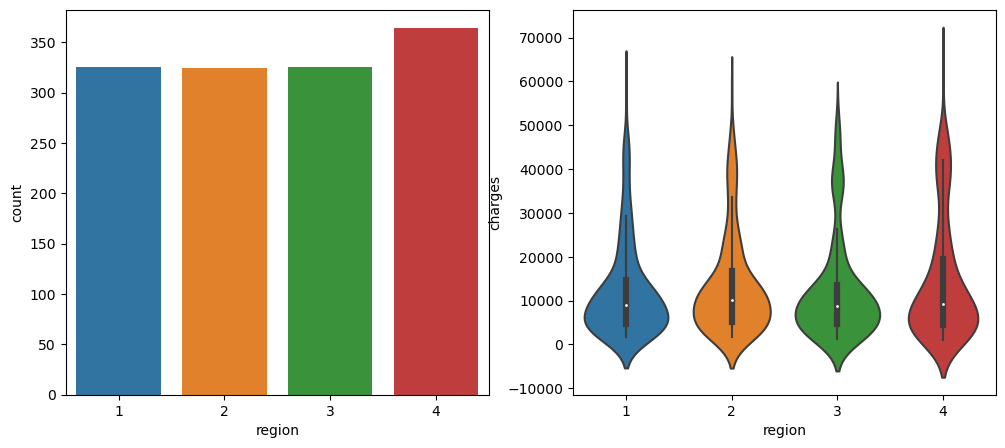

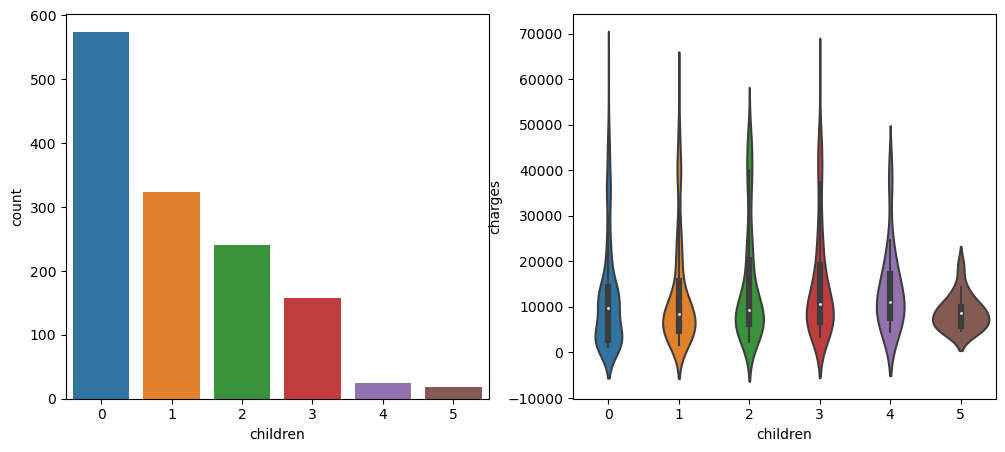

In [21]:
for col in category_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=col, data=train, ax=axes[0])
    sns.violinplot(x=col, y='charges', data=train, ax=axes[1])

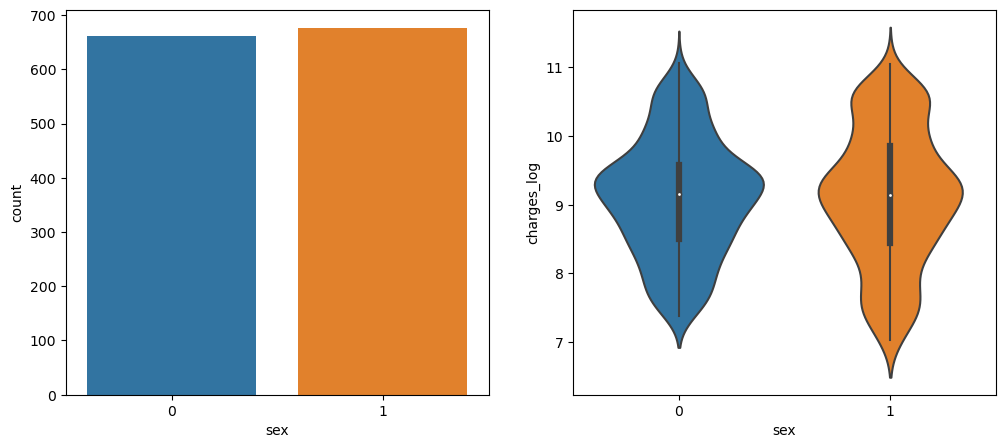

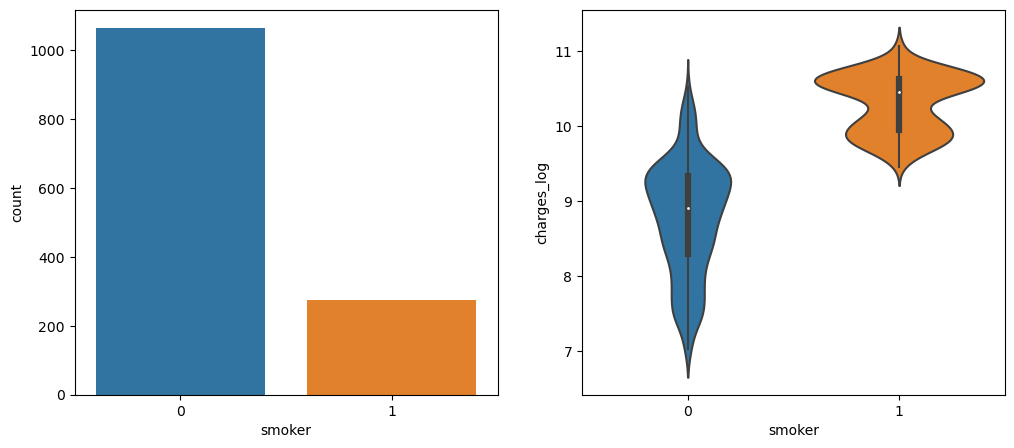

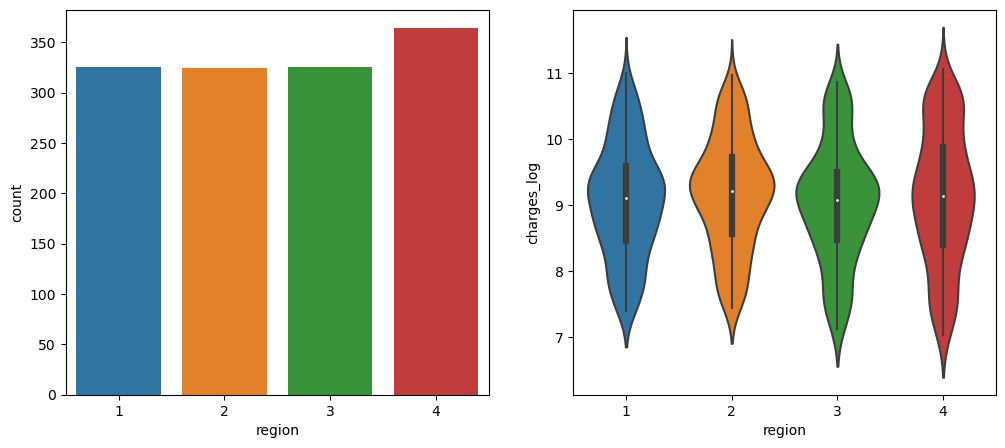

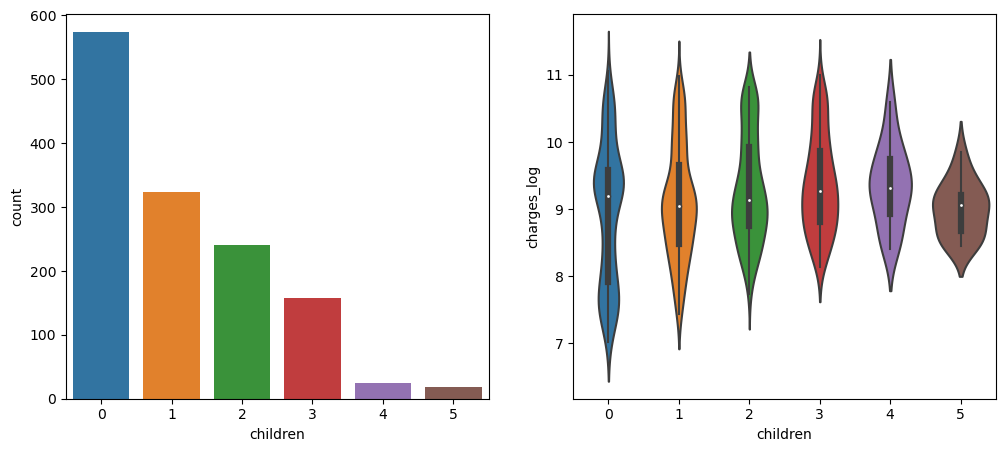

In [22]:
for col in category_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=col, data=train, ax=axes[0])
    sns.violinplot(x=col, y='charges_log', data=train, ax=axes[1])

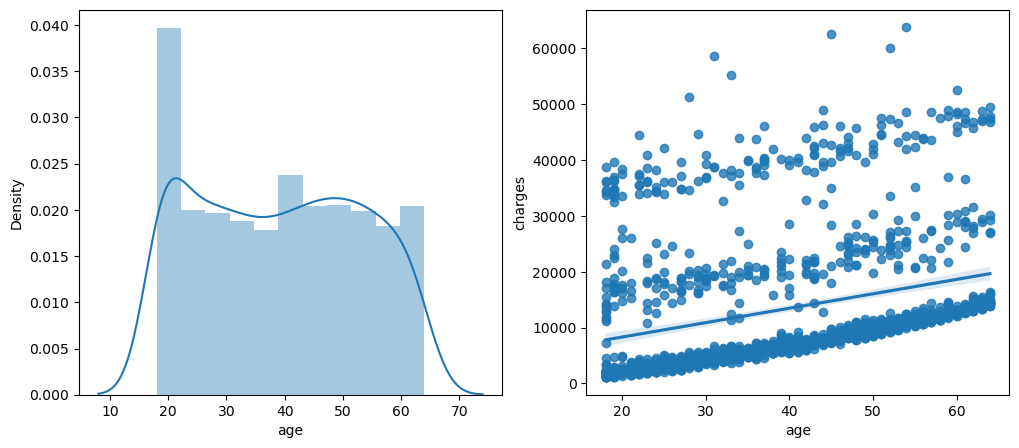

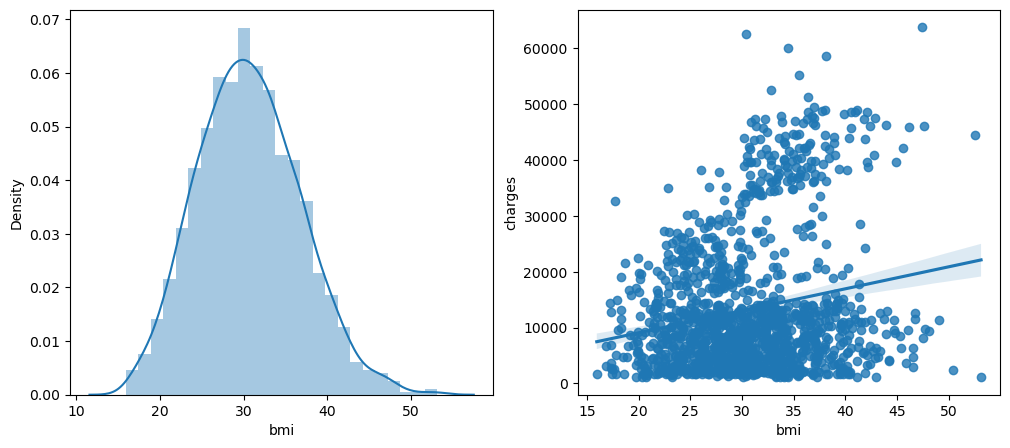

In [23]:
for col in numeric_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.distplot(train[col], ax=axes[0])
    sns.regplot(x=col, y=train['charges'], data=train, ax=axes[1])

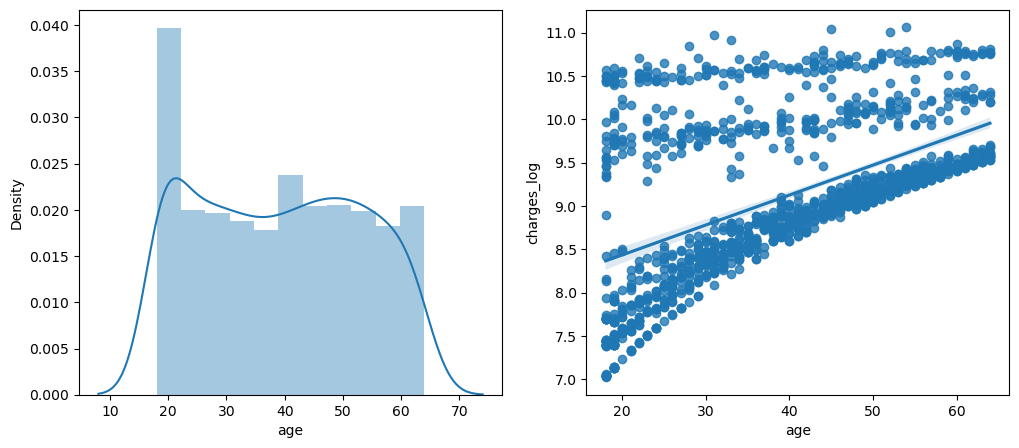

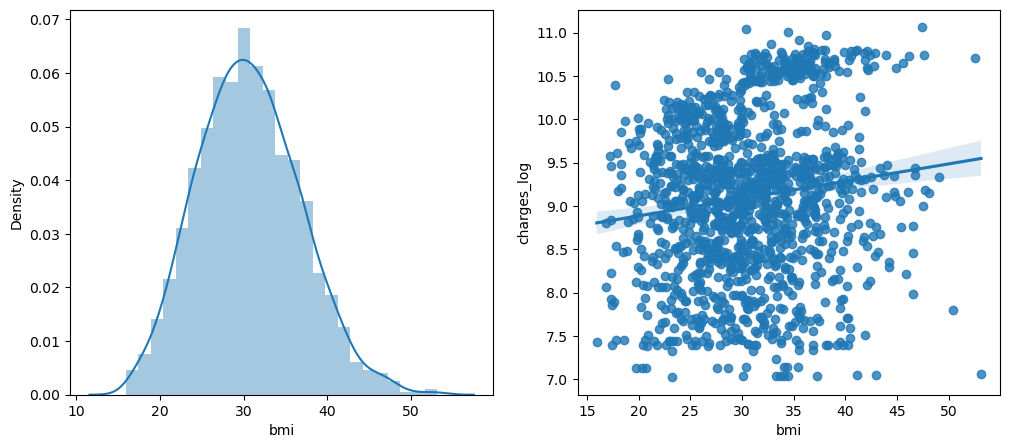

In [24]:
for col in numeric_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.distplot(train[col], ax=axes[0])
    sns.regplot(x=col, y=train['charges_log'], data=train, ax=axes[1])

In [25]:
# 1. 스케일링 없이 진행
drop_col = ['charges', 'charges_log']
Y = train['charges']
Y_log = train['charges_log']

X = train.drop(columns=drop_col)

In [26]:
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, KFold

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [29]:
ridge = Ridge()
lasso = Lasso()
lr = LinearRegression()

ridge.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
lr.fit(X_train, Y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error

pred = ridge.predict(X_train)
mse = mean_squared_error(Y_train, pred)
print("ridge mse : ", format(mse, '.4f'))

pred = lasso.predict(X_train)
mse = mean_squared_error(Y_train, pred)
print("lasso mse : ", format(mse, '.4f'))

pred = lr.predict(X_train)
mse = mean_squared_error(Y_train, pred)
print("linear regression mse : ", format(mse, '.4f'))

ridge mse :  37340206.0883
lasso mse :  37337227.2253
linear regression mse :  37337214.4108


In [31]:
def rmlse(y, y_, convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_]))

    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [32]:
pred = ridge.predict(X_train)
mse = rmlse(Y_train, pred, False)
print("ridge rlmse : ", format(mse, '.4f'))

pred = lasso.predict(X_train)
mse = rmlse(Y_train, pred, False)
print("lasso rlmse : ", format(mse, '.4f'))

pred = lr.predict(X_train)
mse = rmlse(Y_train, pred, False)
print("linear regression rlmse : ", format(mse, '.4f'))

ridge rlmse :  0.9415
lasso rlmse :  0.9483
linear regression rlmse :  0.9493


In [33]:
ridge = Ridge()
score = cross_validate(ridge, X_train, Y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = KFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.7414088763434972 0.7336130088181358


In [34]:
lasso = Lasso()
score = cross_validate(lasso, X_train, Y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = KFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.7414412092388971 0.7336048242921798


In [35]:
lr = LinearRegression()
score = cross_validate(lr, X_train, Y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = KFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.7414412908514734 0.7335893015460246


In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
score = cross_validate(rf, X_train, Y_train, return_train_score=True, n_jobs=-1, cv=KFold())

print(np.mean(score['train_score']), np.mean(score['test_score']))

0.9752845941150936 0.8239326114946053


In [37]:
rf.fit(X_train, Y_train)
pred = rf.predict(X_train)

mse = rmlse(Y_train, pred, False)
mse

0.18777579158894786

In [38]:
# Y_train을 log(Y_train)으로 사용한다면??
rf.fit(X_train, np.log1p(Y_train))
pred = rf.predict(X_train)

mse = rmlse(np.log1p(Y_train), pred)
mse

0.16093619502421058

In [39]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,2
1142,52,0,24.860,0,0,4
969,39,0,34.320,5,0,4
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,2
1130,39,0,23.870,5,0,4
1294,58,1,25.175,0,0,2
860,37,0,47.600,2,1,3


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [43]:
X_train['age'] = scaler.fit_transform(pd.DataFrame(X_train['age']))
X_test['age'] = scaler.transform(pd.DataFrame(X_test['age']))

In [44]:
X_train['bmi'] = scaler.fit_transform(pd.DataFrame(X_train['bmi']))
X_test['bmi'] = scaler.transform(pd.DataFrame(X_test['bmi']))

In [45]:
rf= RandomForestRegressor()

score = cross_validate(rf, X_train, Y_train, cv=KFold(), return_train_score=True, n_jobs=-1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.9759301272001055 0.8212994777187795


In [39]:
rf_params = {
    'n_estimators':[50, 100, 150],
    'max_depth' : range(2, 20, 2)
}


from sklearn import metrics
rmlse_score = metrics.make_scorer(rmlse, greater_is_better=False)
grid_rf = GridSearchCV(RandomForestRegressor(), rf_params, scoring=rmlse_score, cv=5)
grid_rf.fit(X_train, Y_train)
pred = grid_rf.predict(X_train)

mse = rmlse(Y_train, pred, False)
mse

0.527235040337007

In [40]:
grid_rf.best_params_

{'max_depth': 2, 'n_estimators': 50}

In [41]:
grid_rf = RandomForestRegressor(max_depth=2, n_estimators=50)
grid_rf.fit(X_train, Y_train)
pred = grid_rf.predict(X_train)
mse = rmlse(Y_train, pred, False)
mse

0.5242363803154152

In [42]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
pred = rf.predict(X_train)
mse = rmlse(Y_train, pred, False)
mse

0.19072386501004135

In [43]:
pred_test = grid_rf.predict(X_test)
mse = rmlse(Y_test, pred_test, False)
mse

0.5364490901787349

In [44]:
pred_test = rf.predict(X_test)
mse = rmlse(Y_test, pred_test, False)
mse

0.4327085199165507